# Explore Exercise

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
import acquire as a
import prepare as p
import warnings
warnings.filterwarnings('ignore')

from env import host, user, password
from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split




Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.




#  ACQUIRE

In [2]:
# Call the function to get the DataFrame.
store_df = a.get_store_data()


In [3]:
store_df['sales_total'] = store_df['sale_amount'] * store_df['item_price']
store_df.head().T

store_id,1,1,1,1,1
item_id,1,1,1,1,1
sale_id,1,2,3,4,5
sale_date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
sale_amount,13,11,14,13,10
item_upc14,35200264013,35200264013,35200264013,35200264013,35200264013
item_upc12,35200264013,35200264013,35200264013,35200264013,35200264013
item_brand,Riceland,Riceland,Riceland,Riceland,Riceland
item_name,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice
item_price,0.84,0.84,0.84,0.84,0.84
store_address,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy


In [4]:
store_df.reset_index().sales_total.value_counts()

44.37     132
39.15     123
36.54     121
49.59     120
41.76     119
         ... 
170.10      1
160.38      1
150.66      1
167.67      1
117.81      1
Name: sales_total, Length: 329, dtype: int64

In [9]:
# Assuming df is your DataFrame with the sale_date column
# First, ensure that the sale_date column is in datetime format
store_df = p.convert_to_datetime(store_df)

# Now, you can call the date range using pd.date_range()
date_range = pd.date_range(start=store_df['sale_date'].min(), end=store_df['sale_date'].max(), freq='D')

# The date_range variable now contains the range of dates from the minimum to the maximum sale_date in your DataFrame
print(date_range)


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')


In [6]:
# Check the data types and non-null counts
store_df.info()

# Summary statistics of the numerical columns
store_df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 1
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item_id        10000 non-null  int64         
 1   sale_id        10000 non-null  int64         
 2   sale_date      10000 non-null  datetime64[ns]
 3   sale_amount    10000 non-null  int64         
 4   item_upc14     10000 non-null  int64         
 5   item_upc12     10000 non-null  int64         
 6   item_brand     10000 non-null  object        
 7   item_name      10000 non-null  object        
 8   item_price     10000 non-null  float64       
 9   store_address  10000 non-null  object        
 10  store_zipcode  10000 non-null  int64         
 11  store_city     10000 non-null  object        
 12  store_state    10000 non-null  object        
 13  sales_total    10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.1+ M

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_price,store_zipcode,sales_total
count,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.0,10000.000000
mean,3.261000,42157.774000,30.21510,1.960001e+11,1.960001e+11,3.425906,78253.0,128.223601
std,1.594093,29041.368251,17.09331,2.750173e+11,2.750173e+11,2.065471,0.0,138.872235
min,1.000000,1.000000,3.00000,1.111107e+10,1.111107e+10,0.840000,78253.0,3.360000
25%,2.000000,18934.750000,17.00000,2.392333e+10,2.392333e+10,2.430000,78253.0,33.930000
50%,3.000000,37868.500000,25.00000,3.520026e+10,3.520026e+10,2.610000,78253.0,63.180000
75%,5.000000,73236.250000,40.00000,2.085288e+11,2.085288e+11,6.440000,78253.0,206.080000
max,6.000000,92170.000000,115.00000,7.592831e+11,7.592831e+11,6.930000,78253.0,740.600000


In [7]:
store_df.shape

(10000, 14)

In [11]:
# Check for missing values
print(store_df.isnull().sum())

# If there are any missing values, handle them as needed, for example:
# df = df.dropna()  # Drop rows with missing values
# df = df.fillna(0)  # Fill missing values with 0
# df = df.interpolate()  # Interpolate missing values

# Check for duplicates
print(store_df.duplicated().sum())

# If there are any duplicates, remove them if necessary
# df = df.drop_duplicates()


item_id          0
sale_id          0
sale_date        0
sale_amount      0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
sales_total      0
dtype: int64
0


# DATA SPLITTING 

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit) image.png


In [12]:
train_size = 0.70 
n = store_df.shape[0] 
test_start_index = round(train_size * n)
test_start_index

7000

In [13]:
train =  store_df.iloc[:test_start_index] 
test =  store_df.iloc[test_start_index:] 

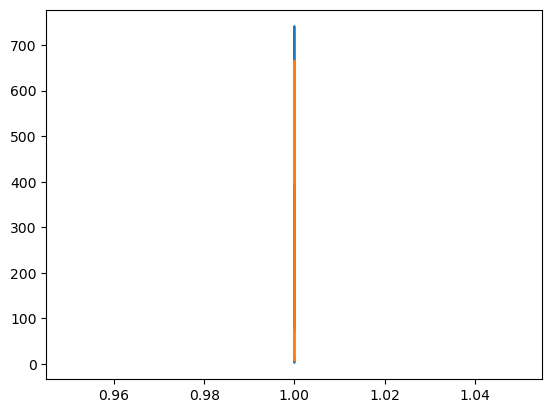

In [14]:
train = store_df[:test_start_index] # everything up (not including) to the test_start_index
test =store_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

# HUMAN-BASED

In [ ]:
train = store_df.loc[:'2013'].copy()
test = store_df.loc['2017':].copy()

In [ ]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.title('Sales total overtime')
plt.show()

# VISUALIZATIONS

In [ ]:
y = train.sales_total
y.head()

1. Blow off the time series

In [ ]:
train.sales_total.plot.hist()
plt.title('distribution of sales total')
plt.show()


In [ ]:
# Convert the index to a DateTime index (if it's not already)
store_df.index = pd.to_datetime(store_df.index)

# Assuming 'store_df' is the DataFrame with 'sales_total' column
store_df.groupby(store_df.index.month)['sales_total'].mean().plot.bar()
plt.tick_params('x', rotation=0)
plt.title('Mean Sales Total by Month')
plt.show()


In [ ]:
# assign a weekday column from the day_name() method on the datetime index
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

In [ ]:
train

In [ ]:
# aggregate on that weekday
train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()

plt.title('mean sales total by day')
plt.show()

In [ ]:
2. target over time

In [ ]:
train.columns

In [ ]:
y.head()

In [ ]:
y.plot();

3. target averaged over various periods over time

In [ ]:
y.resample('6H').mean().plot(title='6 hour average');

In [ ]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('sale_amount  over time')
plt.legend()
plt.show()


4. change in target over time
.diff will allow us to get deltas between values

**look at the difference in data by week**

- resample the data by week, get the average for that week
- make the difference utilizing .diff()
- plot the changes over time in order to examine volatility

In [ ]:
y.resample('W').mean().diff()

In [ ]:
y.resample('W').mean().diff().plot(title='average weekly change in temp');

In [ ]:
y.resample('M').mean().diff().plot(title='average monthly change in temp');

5. Seasonal Plot
shows the comparison of multiple seasons together

our example: one season is one year. multiple lines are shown to show multiple years.

- xaxis: month
- yaxis: y
- color: year

In [ ]:
y.groupby([y.index.year, y.index.month]).mean()[:6]

.unstack
- unstack will make a pivot table of a second order index

In [ ]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

In [ ]:
# In this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

In [ ]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly temperature by year')
plt.show()


6. Seasonal Subseries Plot

In [ ]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

In [ ]:
list1=[1,2,3]
list2=[4,5,6]
for item1, item2 in zip(list1, list2):
    print(item1, item2)
1 4

In [ ]:
for i in table.iteritems():
    print(i)

In [ ]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

7. Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

If your data is sampled daily, you could think of t as 'today', t+1 is 'tomorrow'. More generally, t is any given time period and t+1 is the time period after. If your data is sampled weekly, t is any given week, and t+1 is the following week.

In [ ]:
train['y(t + 1)'] = train.temp.shift(-1)
train.head()


In [ ]:
train.plot.scatter(x='temp', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('hourly lag')
plt.show()

looks like we have a pretty strong linear association between the hour now and the temperature for the next hour


In [ ]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

In [ ]:
weekly  = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
plt.title('lag over 12 weeks')
plt.show()

use pd.plotting.lag_plot

In [ ]:
#same thing, but easier
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=52)
plt.title('lag plot');

8. Autocorrelation Plot
Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.


In [ ]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())
plt.show()

This can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.

9. Seasonal Decomposition
Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

data = Seasonality + Trend + Residual

In [ ]:
import statsmodels.api as sm


In [ ]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)


In [ ]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

In [ ]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();


10 Area Plots

- can we visualize categories over time?

In [ ]:
train.columns

In [ ]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train


In [ ]:
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])


In [ ]:
train.head()


In [ ]:
train.groupby('temp_bin').resample('M').size()


In [ ]:
train.groupby('temp_bin').mean()

In [ ]:
ax = (train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Temp bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)


In [ ]:
train.reset_index().groupby('sales_total').mean()

In [ ]:
# Convert the 'sale_date' column to datetime format
store_df['sales_total'] = pd.to_datetime(store_df['sales_total'])

# Sort the DataFrame by the 'sale_date' column
store_df = store_df.sort_values('sales_total')

In [ ]:
# Split the DataFrame into training, validation, and test sets using the function from prepare.py (as p)
store_df_train, store_df_validate, store_df_test = p.split_store_data(store_df)

In [ ]:
# Check the shapes of the resulting DataFrames
print("Train shape:", store_df_train.shape)
print("Validate shape:", store_df_validate.shape)
print("Test shape:", store_df_test.shape)

In [ ]:
for col in train.columns:
    print(col)
    train[col].hist()
    plt.show()

In [ ]:
# Display the first few rows of each DataFrame
("Train data:")
store_df_train.head()

In [ ]:
("\nValidate data:")
(store_df_validate.head())

In [ ]:
("\nTest data:")
store_df_test.head()

In [ ]:
plt.plot(store_df_train.index, store_df_train.sales_total)
plt.plot(store_df_test.index, store_df_test.sales_total)
plt.show()

In [ ]:
train.sales_total.plot();

In [ ]:
train.sale_amount.plot();

### Average sale amount throughout time

In [ ]:
train.sale_amount.resample('W').mean().plot(label='Weekly average')
train.sale_amount.resample('M').mean().plot(label='Monthly average')
train.sale_amount.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

In [ ]:
train.sale_amount.plot(alpha=.2, label='Hourly')
train.sale_amount.resample('W').mean().rolling(7).mean().plot(alpha=.8, label='1 week')

In [ ]:
train.head()

# AVERAGE SALES OVER TIME 

# MONTHLY SALES OVERTIME

In [ ]:
# Explore the training data
# Plot time series of sales or item demand
p.plot_column(store_df_train, 'sales_total', title='Time Series of Sales Total')

# Check for seasonality and trends
# (You can use seasonal decomposition or autocorrelation plots from the EDA section)

In [ ]:
# Visualize the distribution of sales by month
train['month'] = train.index.month
sns.boxplot(x='month', y='sales_total', data=store_train)
plt.title('Distribution of Sales Total by Month')
plt.show()

In [ ]:
# Visualize the distribution of sales by day of the week
store_df_train['day_of_week'] = store_df_train.index.day_of_week
sns.boxplot(x='day_of_week', y='sales_total', data=train)
plt.title('Distribution of Sales Total by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Investigate any patterns or outliers in the data
# (You can use line plots or scatter plots with lagged values)

# ... Continue exploring the data based on your specific analysis needs

In [ ]:
# Plot the distribution of the target variable (e.g., sales_amount)
plt.figure(figsize=(10, 6))
sns.histplot(store_df['sale_amount'], kde=True)
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculate the train size and test start index
train_size = 0.70
n = store_df.shape[0]
test_start_index = round(train_size * n)


In [ ]:
# Split the DataFrame into training and testing sets
train = store_df[:test_start_index]  # everything up to (not including) the test_start_index
test = store_df[test_start_index:]  # everything from the test_start_index to the end

In [ ]:
# Plot the sales_total column for both training and testing sets
plt.plot(store_df_train.index, store_df_train.sales_total)
plt.plot(test.index, test.sales_total)
plt.title('Sales Total')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
# Plot the sale_amount column for both training and testing sets
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.title('Sale Amount')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
# Split the DataFrame into training and testing sets based on date
train = store_df.loc[:'2016']
test = store_df.loc['2017':]

In [ ]:
# Plot the sale_amount column for both training and testing sets based on date
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.title('Sale Amount - Based on Date')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
# Calculate and plot the mean of sales_total and sale_amount columns for each date in the training set
train_mean_by_date = train.reset_index().groupby('sale_date').mean()
plt.plot(train_mean_by_date.index, train_mean_by_date.sales_total)
plt.plot(train_mean_by_date.index, train_mean_by_date.sale_amount)
plt.title('Mean Sales Total and Sale Amount by Date (Training Set)')
plt.legend(['Sales Total', 'Sale Amount'])
plt.show()

In [ ]:
# Plot histograms for each column in the training set
for col in train.columns:
    print(col)
    train[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
# Call the function to split the data
train, validate, test = p.split_store_data(store_df)

# You can now use the 'train', 'validate', and 'test' DataFrames for further analysis or modeling.


In [ ]:
train.sales_total.plot();

In [ ]:
train.sale_amount.plot();

In [ ]:
train.sale_amount.resample('W').mean().plot(label='Weekly average')
train.sale_amount.resample('M').mean().plot(label='Monthly average')
train.sale_amount.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

In [ ]:
train.sale_amount.plot(alpha=.2, label='Hourly')
train.sale_amount.resample('W').mean().rolling(7).mean().plot(alpha=.8, label='1 week')

In [ ]:
train.head()

In [ ]:
train.month.resample('W').mean().plot(label='Weekly average')
train.month.resample('M').mean().plot(label='Monthly average')
train.month.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

In [ ]:
train.sales_total.plot()

In [ ]:
train_sales=train[['sales_total']]
train_sales

In [ ]:
def plot_averages(dataframe, column):
    plt.figure(figsize=(10, 6))

    dataframe[column].resample('W').mean().plot(label='Weekly average')
    dataframe[column].resample('M').mean().plot(label='Monthly average')
    dataframe[column].resample('Y').mean().plot(label='Yearly average')

    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.title(f'{column} Time Series Averages')

    plt.show()

In [ ]:
plot_averages(train,'month')

In [ ]:
plot_averages(train,'sale_amount')

In [ ]:
def heatmap(dataframe):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe, cmap='YlGnBu')
    plt.title('Heatmap')
    plt.show()

In [ ]:
train_sales=train[['sale_amount']]
train_sales=train_sales.resample('D').mean()
train_sales

In [ ]:
train_sales.loc[:, 'sale_bin'] = pd.qcut(train_sales['sale_amount'], 3, labels=['low', 'med', 'high'])
train_sales

In [ ]:
train_sales.groupby('sale_bin').resample('M').size()

In [ ]:
heatmap(train_sales)

In [ ]:
train_sales.groupby('sale_bin').mean()


In [ ]:
heatmap(train_sales)

In [ ]:
ax = (train_sales.groupby('sale_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Temp bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)

In [ ]:
def plot_area(dataframe, bin_column):
    ax = (dataframe.groupby(bin_column)
          .resample('M')
          .size()
          .unstack(0)
          .apply(lambda row: row / row.sum(), axis=1)
          .plot.area(title=f'{bin_column} bin over time', ylabel='% of the month'))
    
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    ax.yaxis.set_major_formatter('{:.0%}'.format)
    plt.show()

In [ ]:
plot_area(train_sales,'sale_bin')


# TAKEAWAY 
-
-

## OPEN POWER SYSTEMS DATA FOR GERMANY


In [ ]:
#Call the function to get the DataFrame.
power_data_df =a.get_power_data()


In [ ]:
power_data_df.consumption.plot()

In [ ]:
train = power_data_df.loc[:'2014']
test = power_data_df.loc['2015':]

In [ ]:
plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)
plt.show()


In [ ]:
train.head()

In [ ]:
plot_averages(train,'consumption')

In [ ]:
plot_averages(train,'wind+solar')

In [ ]:
train_con=train[['consumption']]
train_con

In [ ]:
train_con.loc[:, 'consumption_bin'] = pd.qcut(train_con['consumption'], 4, labels=['low', 'med', 'med/high','high'])
train_con

In [ ]:
train_con.groupby('consumption_bin').mean()

In [ ]:
train_con.groupby('consumption_bin').plot.area()

In [ ]:
train_ws=train[['wind+solar']]

In [ ]:
train_ws.loc[:,'w+s_bin'] = pd.qcut(train_ws['wind+solar'], 4, labels=['low', 'med', 'med/high','high'])
train_ws